In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [53]:
### Function to save results as .txt files
#import pickle
#def pick(file, name):
#    with open('./ira_txt/' + name + '.txt', "wb") as fp:   #Pickling
#        pickle.dump(file, fp)
#def unpick(name):
#    with open('./ira_txt/' + name + '.txt', "rb") as fp:   # Unpickling
#        file = pickle.load(fp)
#    return file

In [55]:
### Function to save results as .txt files
import pickle
def pick(file, name):
    with open('./ira_txt_1/' + name + '.txt', "wb") as fp:   #Pickling
        pickle.dump(file, fp)
def unpick(name):
    with open('./ira_txt_1/' + name + '.txt', "rb") as fp:   # Unpickling
        file = pickle.load(fp)
    return file

In [3]:
#loc = unpick('loc')
#locMIN = unpick('locMIN')
#debot = unpick('debot')

In [4]:
total_tweets = 9041309
total_users = 3667
tweets_dest = './ira_data/ira_tweets_csv_hashed.csv'

In [5]:
tweet_days = unpick('date_vectors')

Number of users: 3667

Number of tweets: 9041308

Start date: 2009-05-09 
End Date: 2018-06-21
Days: 3331

date of election: 2016-11-08
(as number): 2740

Bar chart of tweets per day over period...

In [6]:
ids = set()

user_val = {}
user_n = {}
i = 0
for user in tweet_days:
    user_val[i] = user
    user_n[user] = i
    ids.add(user)
    i += 1

def uid(i):
    return user_val[i]

def un(user):
    return user_n[user]

In [7]:
print(len(ids))

3667


In [8]:
def to_int(i):
    if i == '': i = 0
    else: i = int(i)
    return i

In [46]:
def to_dict(d, keys):
    for i in range(len(keys)):
        key = keys[i]
        if key != '':
            if key in d: d[key] += 1
            else: d[key] = 1
    return

In [17]:
def sep(st):
    stripped = st.strip('[]')
    stripped = stripped.split(',')
    return stripped

In [18]:
from time import sleep
import sys

T = 500

for i in range(T):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write("[%-100s] %d%%" % (('='* int((i / T) * 100)), int( (i / T) * 100)))
    sys.stdout.flush()
#    sleep(0.01)

[=================================================================================================== ] 99%

In [19]:
def build_row(old_row, target_columns):
    new_row = [].copy()
    for i in target_columns:
        new_row.append(old_row[i])
    return(new_row)

user_info = {}
hashtags = {}
urls = {}
interactions = {}
clients = {}
langs = {}
followed = {}
replies = {}

T = total_tweets-1

### Create dictionary of users and list of tweet times ###
with open(tweets_dest, encoding="utf8") as f:
    reader = csv.reader(f,dialect='excel')
    current = next(reader)
#    user_info[current[1]] = build_row(current,[2,3,4,5,7,8,10])
#    print(build_row(current,[23,24,25,26]))
#    for j in range(len(current)):
#        print(j,':',current[j])
    for i in range(total_tweets-1):
        sys.stdout.write('\r')
        # the exact output you're looking for:
        sys.stdout.write("[%-100s] %d%%" % (('='* int((i / T) * 100)), int( (i / T) * 100)))
        sys.stdout.flush()
        current = next(reader)
        user = current[1]
        url = sep(current[28])
        hashtag = sep(current[27])
#        print(url, hashtag)
        reply_id = sep(current[16])
        rt_id = sep(current[19])
        mention_id = sep(current[29])
        client = sep(current[14])
        lang = sep(current[11])
#        print(reply_id, rt_id, mention_id, client, lang)
        fs = build_row(current,[23,24,25,26])
        fs = list(map(to_int, fs))
        fs = np.array(fs)

        if user in user_info:
            urls[user] = urls[user].union(set(url))
            followed[user] += fs
            to_dict(hashtags[user],hashtag)
            to_dict(replies[user],reply_id)
            to_dict(replies[user],rt_id)
            to_dict(replies[user],mention_id)
            to_dict(clients[user],client)
            to_dict(langs[user],lang)
        else: 
            user_info[user] = build_row(current,[2,3,4,5,7,8,10])
            urls[user] = set(url)
            followed[user] = fs
            hashtags[user] = {}
            replies[user] = {}
            clients[user] = {}
            langs[user] = {}
f.close()

[==========                                                                                          ] 10%                                                                                                    ] 0%[=                                                                                                   ] 1%[=                                                                                                   ] 1%[=                                                                                                   ] 1%[==                                                                                                  ] 2%[===                                                                                                 ] 3%[====                                                                                                ] 4%[====                                                                                                ] 4%[=====                                                 

KeyboardInterrupt: 

In [20]:
t1 = time.time()
total = t1-t0
X = total * (total_tweets / i)
print(X)

13315.77901772211


9.12024471803459

In [34]:
#dicts = [user_info,hashtags,urls,clients,langs,followed,replies]
#names = ['user_info','hashtags','urls','clients','langs','followed','replies']
#
#for i in range(len(dicts)):
#    pick(dicts[i],names[i])

In [48]:
names = ['user_info','hashtags','urls','clients','langs','followed','replies']

In [ ]:
#user_info = unpick(names[0])

In [ ]:
#hastags = unpick(names[1])

In [ ]:
#urls = unpick(names[2])

In [ ]:
#clients = unpick(names[3])

In [ ]:
#langs = unpick(names[4])

In [ ]:
#followed = unpick(names[5])

In [ ]:
#replies = unpick(names[6])

In [54]:
dicts = [{},{},{},{},{},{},{}]
for i in range(len(dicts)):
    dicts[i] = unpick(names[i])
#user_info = dicts[0]
#hashtags = dicts[1]
#urls = dicts[2]
#clients = dicts[3]
#langs = dicts[4]
#followed = dicts[5]
#replies = dicts[6]

In [56]:
for i in range(len(dicts)):
    pick(dicts[i],names[i])

In [47]:
#adjacency = np.array([[0,0,1],[0,0,0],[1,0,0]])
#import networkx as nx
#
#def show_graph_with_labels(adjacency_matrix, mylabels):
#    rows, cols = np.where(adjacency_matrix == 1)
#    edges = zip(rows.tolist(), cols.tolist())
#    gr = nx.DiGraph()
#    gr.add_edges_from(edges)
#    nx.draw(gr, node_size=5)
#    plt.show()
#
#show_graph_with_labels(C_M, [])

In [48]:
#connections = np.zeros((3667,3667),int)
#referenced = {}
#for user in replies:
#    print(un(user))
#    reps = replies[user]
#    for target in reps:
#        print(target)
#        if target in ids:
#            i = un(user)
#            j = un(target)
#            print(i,j)
#            connections[i,j] += 1#reps[target]
#        if target in referenced: referenced[target] += reps[target]
#        else: referenced[target] = reps[target]
#    break

# How often users mention other users

In [57]:
### Create connectivity matrix
replies = unpick(names[6])
t0 = time.time()

C_M = np.zeros((3667,3667),int)

for userA in replies:
    idA = un(userA)
#    print(idA)
    reps = replies[userA]
    for userB in reps:
#        print(userB)
        if userB in ids:
            idB = un(userB)
            C_M[idA,idB] = reps[userB]
#            print(idA, idB)
#    break
t1 = time.time()
total = t1-t0
#del(replies)

In [58]:
print(np.sum(C_M))

2151287


20522.5


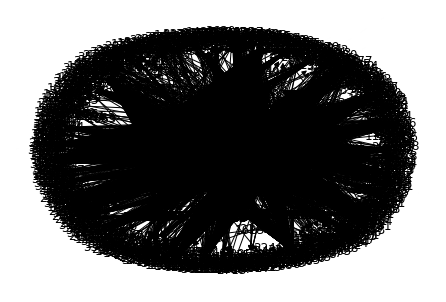

In [43]:
import networkx as nx

t0 = time.time()

G = nx.from_numpy_matrix(C_M, create_using=nx.DiGraph())
#G.remove_node(0)
#G.remove_nodes_from(list(nx.isolates(G)))

print(0.5 * len( [ 1 for (u,v) in G.edges() if u in G[v] ] ) )

#pos=nx.spring_layout(G, k = 2, seed = 5)
#nx.draw(G,pos, node_color = cmap)
#nx.draw_networkx_labels(G,pos)

#plt.show()

cmap = []

#pos=nx.spring_layout(G, k = 2, seed = 5)

pos = nx.fruchterman_reingold_layout(G)
t2 = time.time()
nx.draw(G,pos, node_color = cmap)
nx.draw_networkx_labels(G,pos)

t1 = time.time()
total = t1-t0

plt.show()

In [45]:
print(total)
print(t2 - t0)

301.80014085769653
85.67060923576355


In [ ]:
fruchterman_reingold_layout

In [28]:
X = total
print(X)

0.4238777160644531


In [30]:
print(np.sum(C_M))

2151287


In [20]:
## Remove self mentions
#for i in range(3667):
#    C_M[i,i] = 0

In [59]:
pick(C_M,'C_M')

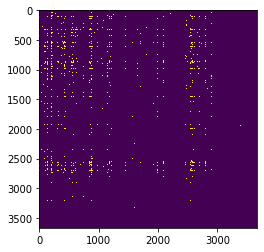

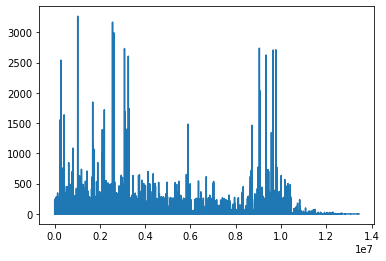

In [66]:
#plt.imshow(C_M)
#plt.show()
plt.plot(((C_M.flatten()).tolist()))
plt.show()

In [60]:
x = 0
for i in range(3667):
    if np.sum(C_M[i]) > 10: x += 1
print(x)

1951


In [61]:
high_ms = set()
high_md = set()
for i in range(3667):
    for j in range(3667):
        if C_M[i,j] > 1000:
            high_ms.add(i)
            high_md.add(j)

In [62]:
print(len(high_ms), len(high_md))
print(len(intersect(high_ms,high_md)))

34 39


NameError: name 'intersect' is not defined

In [68]:
def cluster_refs(cluster):
    total_refs = 0
    cluster_refs = 0
    for i in cluster:
        total_refs += np.sum(C_M[i])
        for j in cluster:
            cluster_refs += C_M[i,j]
    return total_refs, cluster_refs

In [88]:
clusteredD = []
clusteredM = []

for i in range(len(loc)):
    if i != 0: clusteredD = clusteredD + loc[i]
        
for i in range(len(locMIN)):
    if i != 0: clusteredM = clusteredM + locMIN[i]

In [167]:
def union(A,B):
    A = set(A)
    B = set(B)
    return list(A.union(B))

def intersect(A,B):
    A = set(A)
    B = set(B)
    return list(A.intersection(B))

def subtract(A,B):
    A = set(A)
    B = set(B)
    return list(A - B)

In [171]:
#print(len(clusteredD), len(clusteredM), len(debot))

D = clusteredD
M = clusteredM
bot = debot

DuM = union(D,M)
DnM = intersect(D,M)
D_M = subtract(D,M)
M_D = subtract(M,D)

lists = [clusteredD, clusteredM, debot, DuM, DnM, D_M, M_D]

for l in lists:
    print(len(l))

1856
1726
1058
2844
738
1118
988


In [172]:
import random

N = 25

for cluster in lists:
    
    S = len(cluster)
    Acc = 0
    for i in range(N):
        L = random.sample(range(3667), S)
        tr, cr = cluster_refs(L)
        Acc += (cr / tr)
    print('EX: ',Acc / N)
    
    tr, cr = cluster_refs(cluster)
    print('Ac: ', cr / tr)



EX:  0.49860219847708726
Ac:  0.7855127260069855
EX:  0.47564187508221784
Ac:  0.45699503884849546
EX:  0.29031862150683735
Ac:  0.28289095897403177
EX:  0.7772446690051228
Ac:  0.8443871135607345
EX:  0.19582829903045146
Ac:  0.2752987523118591
EX:  0.30989839508950234
Ac:  0.7947752415667756
EX:  0.26729716526012653
Ac:  0.31472711301225986


# look at URL shares 

In [174]:
urls = unpick(names[2])
def url_profile(cluster):
    profile = {}
    for user in cluster:
        idA = uid(user)
        url_shares = list(urls[idA])
        for url in url_shares:
            if url in profile: profile[url] += 1
            else: profile[url] = 1
    return profile

In [175]:
N = 5
S = 1800
Acc = 0
for i in range(N):
    L = random.sample(range(3667), S)
    cluster_profile = url_profile(L)
    Total = len(cluster_profile)
    Same = 0
    for url in cluster_profile:
        Same += cluster_profile[url]
    Acc += (Total/Same)
#    print(T,S, T/S)
print(Acc / N)

0.7023407238113781


In [176]:
for cluster in lists:
    cluster_profile = url_profile(cluster)
    Total = len(cluster_profile)
    Same = 0
    for url in cluster_profile:
        Same += cluster_profile[url]
    print(Total / Same)

0.6215828422283235
0.445086693135941
0.6793243441364679
0.6013807746365918
0.43975938457979064
0.6400861557003917
0.49932557051229115


In [177]:
N = 10
for cluster in lists:
    
    S = len(cluster)
    Acc = 0
    
    for i in range(N):
        L = random.sample(range(3667), S)
        cluster_profile = url_profile(L)
        Total = len(cluster_profile)
        Same = 0
        for url in cluster_profile:
            Same += cluster_profile[url]
        Acc += (Total/Same)
    print('Expected: ', Acc / N)
    
    cluster_profile = url_profile(cluster)
    Total = len(cluster_profile)
    Same = 0
    for url in cluster_profile:
        Same += cluster_profile[url]
    print('Actual: ', Total / Same)

Expected:  0.7034838062710499
Actual:  0.6215828422283235
Expected:  0.7109497823609069
Actual:  0.445086693135941
Expected:  0.7653948557537645
Actual:  0.6793243441364679
Expected:  0.6554450250334556
Actual:  0.6013807746365918
Expected:  0.7986802939446629
Actual:  0.43975938457979064
Expected:  0.7620198771056157
Actual:  0.6400861557003917
Expected:  0.7751721128338664
Actual:  0.49932557051229115


# Look at #'s

In [178]:
hashtags = unpick(names[1])

In [179]:
print(len(hashtags))

3667


In [180]:
def hashtag_profile(cluster):
    profile = {}
    for user in cluster:
        idA = uid(user)
        hashtag_shares = list(hashtags[idA])
        for hashtag in hashtag_shares:
            if hashtag in profile: profile[hashtag] += 1
            else: profile[hashtag] = 1
    return profile

In [181]:
N = 10
S = 1058
Acc = 0
for i in range(N):
    L = random.sample(range(3667), S)
    cluster_profile = hashtag_profile(L)
    Total = len(cluster_profile)
    Same = 0
    for hashtag in cluster_profile:
        Same += cluster_profile[hashtag]
    Acc += (Total/Same)
#    print(T,S, T/S)
print(Acc / N)

0.35052161522249814


In [183]:
N = 15
for cluster in lists:
    
    S = len(cluster)
    Acc = 0
    
    for i in range(N):
        L = random.sample(range(3667), S)
        cluster_profile = hashtag_profile(L)
        Total = len(cluster_profile)
        Same = 0
        for hashtag in cluster_profile:
            Same += cluster_profile[hashtag]
        Acc += (Total/Same)
    print('Expected: ', Acc / N)
    
    cluster_profile = hashtag_profile(cluster)
    Total = len(cluster_profile)
    Same = 0
    for hashtag in cluster_profile:
        Same += cluster_profile[hashtag]
    print('Actual: ', Total / Same)

Expected:  0.2827016781131558
Actual:  0.25543609136557827
Expected:  0.2931800151281035
Actual:  0.196990590702065
Expected:  0.35073507301647844
Actual:  0.24900783427627826
Expected:  0.24338111421576175
Actual:  0.2106193092419201
Expected:  0.3890278526120502
Actual:  0.29030813482836426
Expected:  0.3384744489962157
Actual:  0.275036178523404
Expected:  0.3527209237650339
Actual:  0.2040100104760796


In [27]:
def cluster_hashtags(cluster):
    mention_props = {}
    size = len(cluster)
    i = 0
    for user in cluster:
        reps = hashtags[user]
        for target in reps:
            if target in mention_props: mention_props[target][i] += reps[target]
            else: 
                a = np.zeros(size,int)
                a[i] = reps[target]
                mention_props[target] = a
        i += 1
    for target in mention_props:
        mention_props[target] = [mention_props[target], total_hash[target]]
    return mention_props

In [28]:
total_mentions = {}
for user in replies:
    mentions = replies[user]
    for user1 in mentions:
        t = mentions[user1]
        if user1 in total_mentions:
            total_mentions[user1] += t
        else:total_mentions[user1] = t

In [35]:
### Cluster data
#B = unpick('clustersb')
#clusters = unpick('clustersa')
#clusters = unpick('clusters')
#cluster = clusters[4]
#print(len(cluster))

72


In [32]:
total_hash = {}
for user in replies:
    reps = hashtags[user]
    for target in reps:
        if target in total_hash: total_hash[target] += reps[target]
        else: total_hash[target] = reps[target]

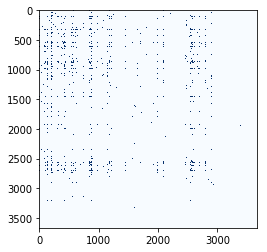

180488

In [34]:
plt.imshow(connections, cmap = 'Blues')
plt.show()
np.sum(connections)

In [19]:
def cluster_self_response(cluster_nums):
    total = 0
    for i in cluster_nums:
        for j in cluster_nums:
            total += connections[i][j]
    return total

In [20]:
def cluster_targets(cluster):
    mention_props = {}
    size = len(cluster)
    i = 0
    for user in cluster:
        reps = replies[user]
        for target in reps:
            if target in mention_props: mention_props[target][i] += reps[target]
            else: 
                a = np.zeros(size,int)
                a[i] = reps[target]
                mention_props[target] = a
        i += 1
    for target in mention_props:
        mention_props[target] = [mention_props[target], referenced[target]]
    return mention_props

In [43]:
i = 0
#C_data = {}
A = unpick('clustersa')
test = A[1]
clusters = A

In [ ]:
for j in range(len(clusters)):
    C_data = {}
    cluster = clusters[j]
    cluster_i = cluster_ids(cluster)
    print(len(cluster))
    if j != 0:
        u_t = cluster_targets(cluster_i)
        c_h = cluster_hashtags(cluster_i)
        s_m = cluster_self_response(cluster)
#        test = cluster_ids(cluster)
        ur = url_info(cluster_i)
        C_data = [u_t,c_h,s_m,ur]
        pick(C_data, './ira_data/C_data' + str(j))
    if j == 1:break

1995
465
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


In [47]:
for j in range(len(clusters)):
    if j != 0:
        C_data = unpick('./ira_data/C_data' + str(j))
        cluster = clusters[j]
        cluster_i = cluster_ids(cluster)
        print(len(cluster))
    if j != 0:
        sr = C_data[2]
        ur = C_data[3]
        print(sr,ur)
        if j == 10:break

465
191072 [619360, 329569]
96
34190 [17278, 33]
82
35494 [752996, 2570]
72
0 [439, 319]
51
0 [1, 1]
46
0 [35, 16]
44
7 [204884, 2672]
42
518 [94027, 13474]
42
25 [162654, 832]
36
344 [42138, 3955]


In [ ]:
501
224800 (637847, 901599)
110
0 [459, 361]
96
34190 [17278, 33]
87
35537 [829415, 2628]
51
0 [1, 1]
46
0 [35, 16]
46
586 [99730, 14664]
44
7 [204884, 2672]
43
25 [162894, 1223]
36
344 [42138, 3955]

In [319]:
for user in urls:
#    print(urls[user])
    break

In [22]:
def url_info(group):
    same_urls = set()
    all_urls = set()
    i = 0
    for user1 in group:
        X = set(urls[user1])
        all_urls = all_urls.union(X)
        for user2 in group:
            if user2 != user1:
                Y = set(urls[user2])
                same_urls = same_urls.union(X.intersection(Y))
        print(i)
        i += 1
    return [len(all_urls), len(same_urls)]

In [49]:
#proportions = cluster_targets(test)
proportions = cluster_hashtags(A[1])

KeyError: 4

In [23]:
### Could easily be spiked by one user
h_ratios = {}
for p in proportions:
    [a, b] = proportions[p]
#    print(b)
    a = np.where(a>5,a,0)
    if sum(a) > 0:
        tot = sum(a) / b
        high = a/sum(a)
        high = list(filter(lambda x: x < 0.999 , high))
        high = list(filter(lambda x: x > 0.001, high))
        if len(high) > 2: h_ratios[p] = [len(high),tot, b, sum(a)]

NameError: name 'proportions' is not defined

In [29]:
for h in h_ratios:
    [x,y,b,a] = h_ratios[h]
    lab = h + ': ' +str(a) + ' / ' + str(b)
    if y > 0.15: plt.scatter(x,y, label = lab)
    else:plt.scatter(x,y)
    plt.legend()
plt.show()

NameError: name 'h_ratios' is not defined

In [26]:
total = 0
for cluster in clusters:
    total += cluster_self_response(cluster)
print(total)

613118


In [22]:
#test = []
#for i in range(len(dicts)):
#    test.append(unpick(names[i]))

In [45]:
def cluster_ids(cluster):
    ids = []
    for i in cluster:
        ids.append(uid(i))
    return ids

In [46]:
def common_urls(cluster):
    common = set()
    same = 0
    for user in cluster:
        same += len(common.intersection(urls[user]))
        common = common.union(urls[user])
    return len(common), same      

In [230]:
### Temporal data
t_data = []
for user in tweet_days:
            t_data.append(tweet_days[user])
t_data = np.array(t_data)
#plt.plot(t_data[cluster])
#plt.show()